<a href="https://colab.research.google.com/github/THEABHASHARMA/Business-Case-Walmart---Confidence-Interval-and-CLT/blob/main/business_case_walmart_review_16th_march_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<h1>Business Case: Walmart Review <img src="https://cdn.dribbble.com/userupload/5249948/file/original-af6c722d469e1717d1d130299f33278d.gif" width=20%>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
print(df.shape)
df.head()

(550068, 10)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# CLT>> sample>> mean >> repating
# sample_size? ^^, width/spread decreases
# repeat?

In [ ]:
# eg 95% confidenece
# F [1000, 2500]>> 2499
# M [1500, 2600]>> 1501

In [ ]:
df.Gender.value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [ ]:
g_u_count = df.groupby("Gender")["User_ID"].nunique()
g_u_count*100/g_u_count.sum()

Gender
F    28.280428
M    71.719572
Name: User_ID, dtype: float64

In [ ]:
df.groupby("User_ID").sum().reset_index()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
0,1000001,350,0,213,334093
1,1000002,1232,0,354,810472
2,1000003,435,0,93,341635
3,1000004,98,14,33,206468
4,1000005,2120,106,659,821001
...,...,...,...,...,...
5886,1006036,7710,514,3200,4116058
5887,1006037,122,0,938,1119538
5888,1006038,12,0,83,90034
5889,1006039,0,74,439,590319


In [ ]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
# -1 0 1 2 3   >> median = 1, mean=1
# -100 0 1 2 3 >> median = 1, mean=-18.8
# -1 0 1 2 300   >> median = 1, mean=60.4

In [ ]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='Purchase'>

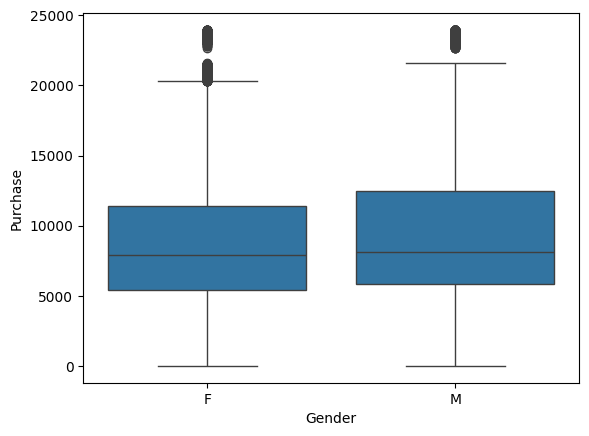

In [ ]:
sns.boxplot(x="Gender", y="Purchase", data=df)

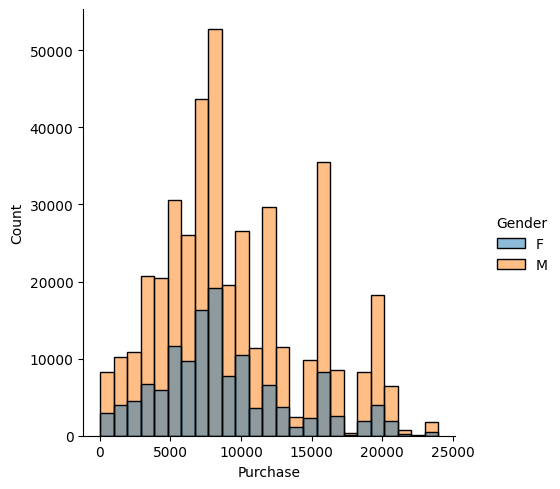

In [ ]:
sns.displot(hue="Gender", x="Purchase", data=df, bins=25)

In [ ]:
# CLT
# 1. sample
# 2. mean of sample
# 3. repeat 1 and 2 for some time

In [ ]:
SAMPLE_SIZE = 300
NUM_OF_ITERATIONS = 1000

In [ ]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
df.sample(300).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,81.0,8551.691358,4760.800194,586.0,5434.0,7484.0,11446.0,19611.0
M,219.0,9275.995434,5235.657078,60.0,5416.5,8120.0,12100.0,23547.0


In [ ]:
df.sample(300).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,74.0,8045.229730,4915.427794,369.0,4467.0,7122.5,9802.75,19316.0
M,226.0,9633.814159,5379.360744,26.0,5437.5,8155.5,13212.00,23540.0


In [ ]:
SAMPLE_SIZE = 300
NUM_OF_ITERATIONS = 1000

In [ ]:
# 300, 600, 1200, 2400, 4800 [SAMPLE_SIZE]
# until you get a bell curve [NUM_OF_ITERATIONS]

In [ ]:
df_filtered = df[df.Gender=="M"]
male_spends = []
for iter in range(NUM_OF_ITERATIONS):
    male_spends.append(
        df_filtered.sample(SAMPLE_SIZE).Purchase.mean()
    )

In [ ]:
np.mean(male_spends)

9439.324690000001

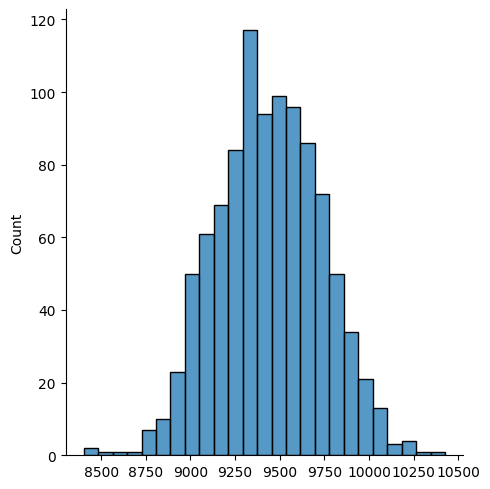

In [ ]:
sns.displot(x=male_spends, bins=25)

In [ ]:
# list comprehension
sq_nums = [num**2 for num in range(5)]
sq_nums

[0, 1, 4, 9, 16]

In [ ]:
female_spends = [df[df.Gender=="F"].sample(SAMPLE_SIZE).Purchase.mean() for iter in range(NUM_OF_ITERATIONS)]
print(np.mean(female_spends))

8735.75756


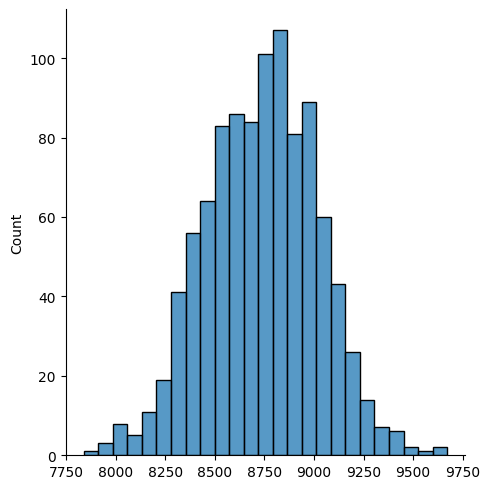

In [ ]:
sns.displot(x=female_spends, bins=25)

In [ ]:
# confidence interval, confidence level = 95%
# 1: percentile method
# 2: z score method

In [ ]:
# percentile method
print("male_spends")
print(np.percentile(male_spends, [2.5, 97.5]))
print("female_spends")
print(np.percentile(female_spends, [2.5, 97.5]))

male_spends
[ 8899.40483333 10006.46825   ]
female_spends
[8200.44516667 9262.59633333]


In [ ]:
# z score method
# min = mean-1.96*std_error>> std_error = std_pop/root(n) = mean_sample >> /n
# min = mean-1.96*std
# max = mean+1.96*std

In [ ]:
print("male_spends")
print(np.mean(male_spends)-1.96*np.std(male_spends))
print(np.mean(male_spends)+1.96*np.std(male_spends))
print("female_spends")
print(np.mean(female_spends)-1.96*np.std(female_spends))
print(np.mean(female_spends)+1.96*np.std(female_spends))


male_spends
8862.902815140751
10015.746564859252
female_spends
8184.149262701781
9287.36585729822
